#*Датасет: аренда велосипедов*
##Савинченко Юлия, 932003 (Последняя цифра зачётной книжки: 3)
##Лабораторная работа №1

*Описание:* (https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset)
- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


##1. Получить описание набора данных и список атрибутов, получить число пропущенных значений в для каждого атрибута.

In [3]:
data = pd.read_csv("/content/gdrive/My Drive/bike+sharing+dataset/day.csv",sep=',')
data

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0             2  0.344167  0.363625  0.805833   0.160446     331         654   
1             2  0.363478  0.353739  0.696087   0.248539     131         670   
2             1  0.196364  0.189405  0.437273   0.248309     120        1229   
3             1  0.200000  0.212122  0.590435   0.160296     108        1454   
4             1  0.226957  0.229270  0.436957   0.186900      82        1518   
..          ...       ...       ...       ...        ...     ...         ...   
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
726  2114  
727  3095  
728  1341  
729  1796  
730  2729  

[731 rows x 16 columns]

In [4]:
data.describe()

instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.544894    0.183051    0.162961    0.142429    0.077498   
min      0.000000    1.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    1.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    1.000000    0.498333    0.486733    0.626667    0.180975   
75%      1.000000    2.000000    0.655417    0.608602    0.730209    0.233214   
max      1.000000    3.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


##2. Обработать пропущенные значения (удалить строки/ удалить атрибуты/ выполнить импутацию значений).

In [6]:
data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
data['dteday'].value_counts()

2011-01-01    1
2012-04-25    1
2012-04-27    1
2012-04-28    1
2012-04-29    1
             ..
2011-09-03    1
2011-09-04    1
2011-09-05    1
2011-09-06    1
2012-12-31    1
Name: dteday, Length: 731, dtype: int64

Пропущенные значения отсутствуют

In [50]:
dupl = data.dupl()
for j in range(len(dupl)):
  if dupl[j]:
    print(j)

Повторяющиеся значения отсутствуют

##3. Построить pairplot для набора данных.

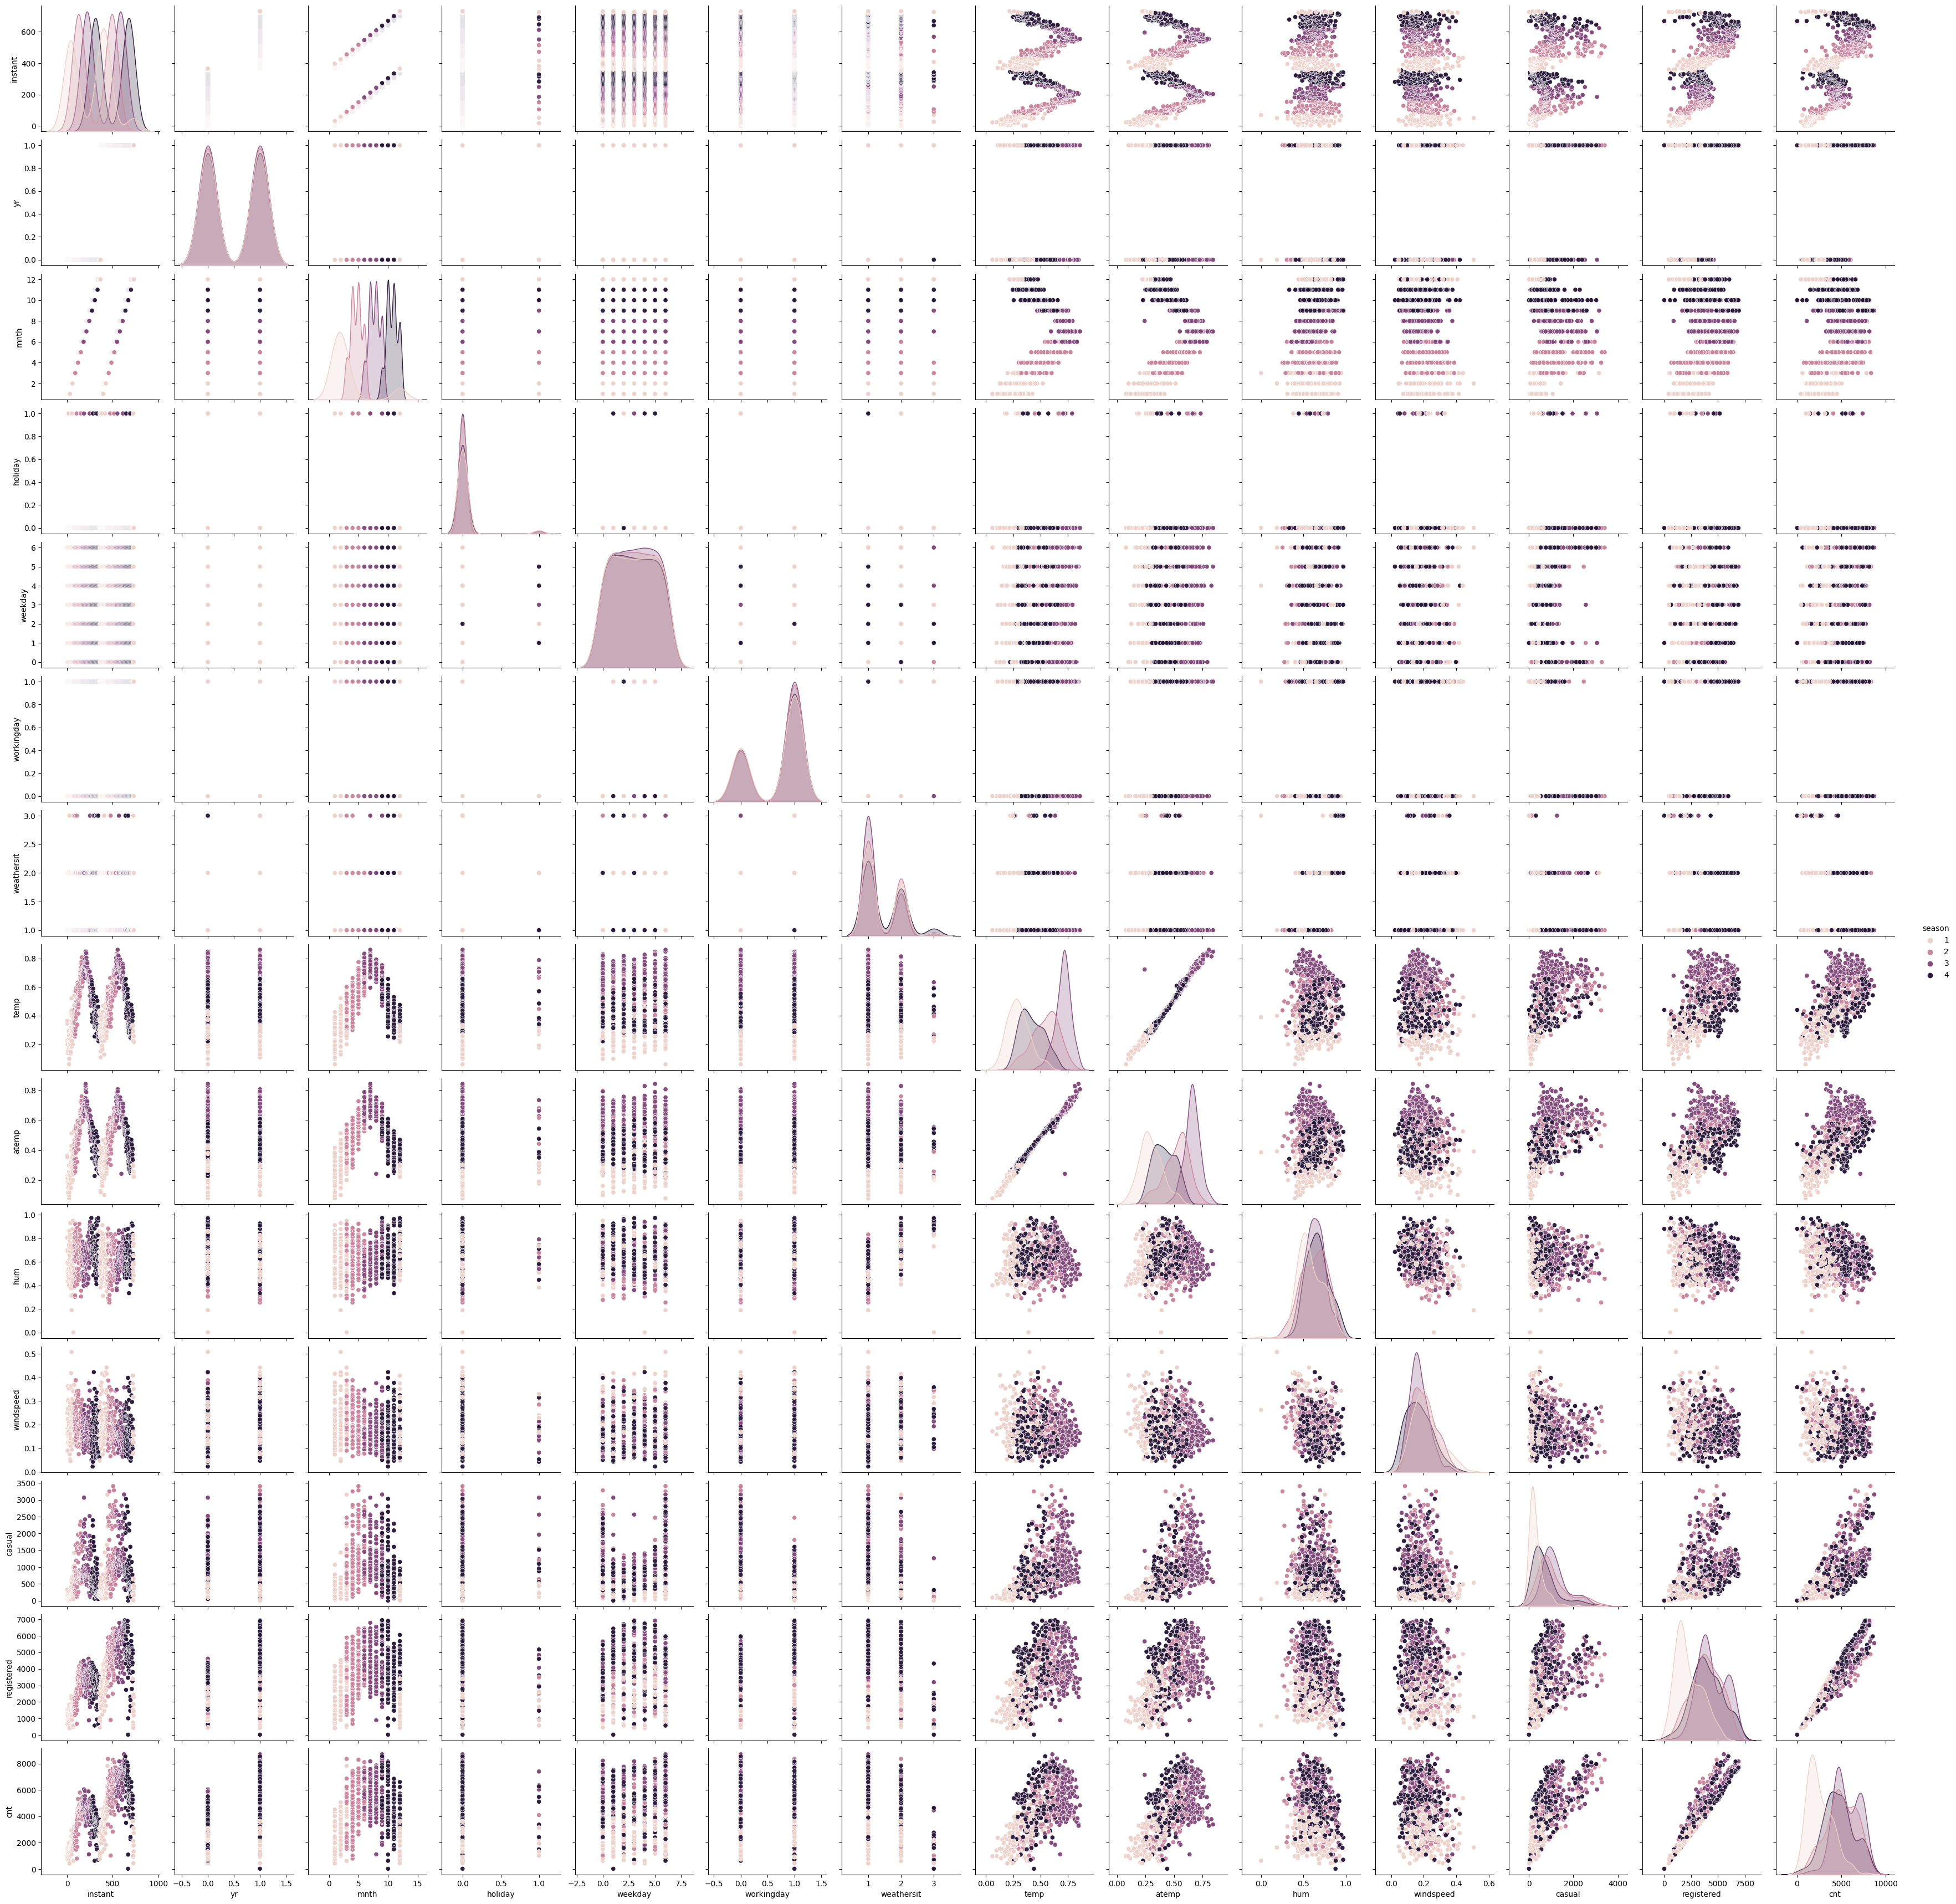

In [9]:
sns.pairplot(data, hue='season')
plt.show()

<ipython-input-52-cd9dd9b95059>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pairplotData['weekday'] = pairplotData['weekday'].replace(arrDay)


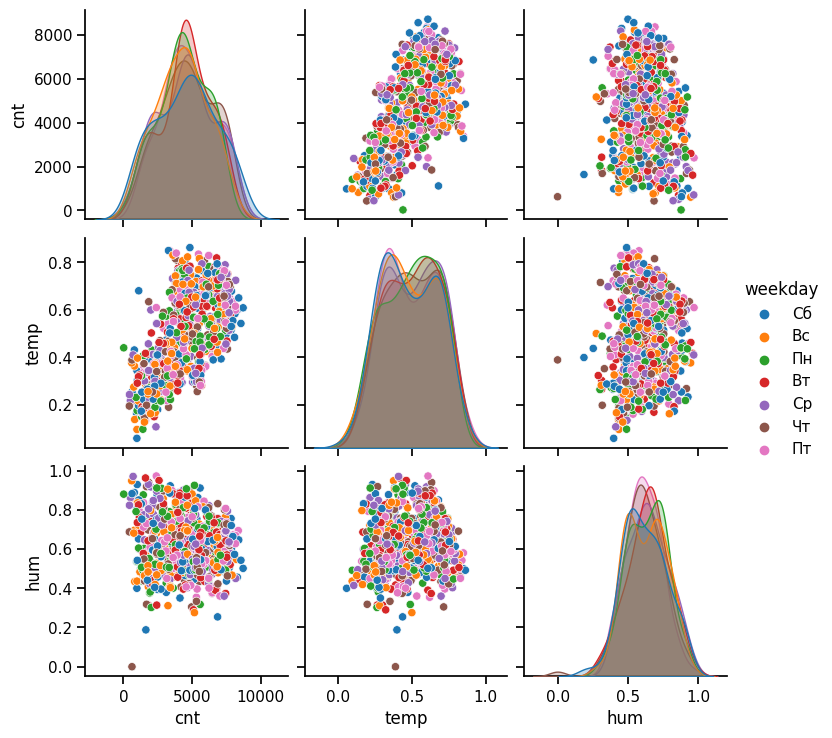

In [52]:
arrDay = {0: 'Вс', 1: 'Пн', 2: 'Вт', 3: 'Ср', 4: 'Чт', 5: 'Пт', 6: 'Сб'}
pairplotData = data[['cnt', 'temp', 'hum', 'weekday']]
pairplotData['weekday'] = pairplotData['weekday'].replace(arrDay)
sns.pairplot(pairplotData, hue = 'weekday')

##4. Выбрать не менее 2-х признаков с неким распределением значений, и отобразить это распределение с помощью гистограмм hist и kdeplot, jointplot.

Text(0.5, 0, 'Скорость ветра')

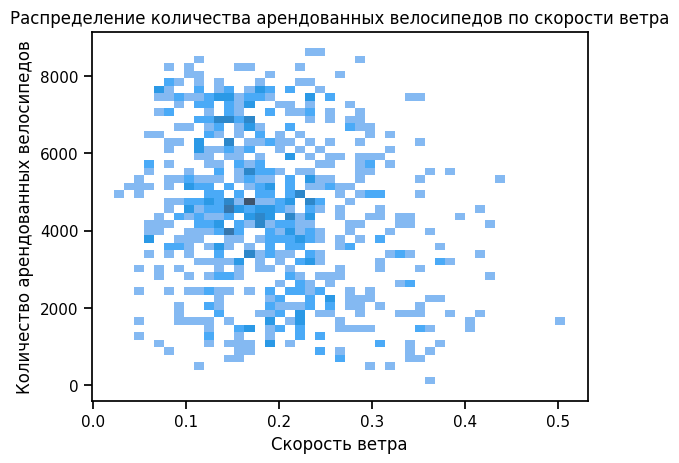

In [58]:
plt.title('Распределение количества арендованных велосипедов по скорости ветра')
sns.histplot(data = data, y = 'cnt', x = 'windspeed', bins = 45)
plt.ylabel('Количество арендованных велосипедов')
plt.xlabel('Скорость ветра')

Text(0.5, 0, 'Количество арендованных велосипедов')

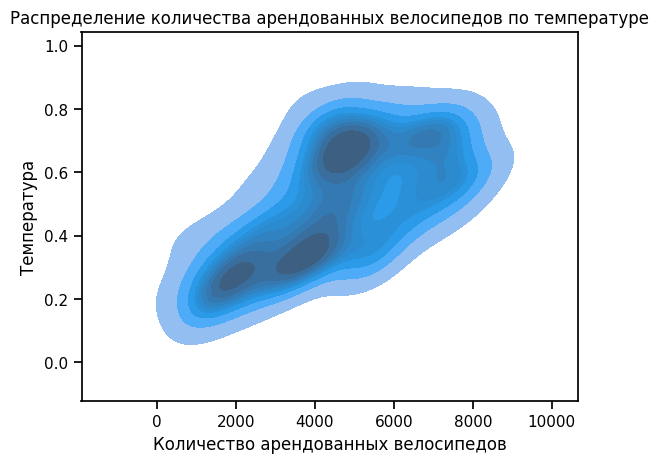

In [59]:
plt.title('Распределение количества арендованных велосипедов по температуре')
sns.kdeplot(data = data, x = 'cnt', y = 'temp', fill = True)
plt.ylabel('Температура')
plt.xlabel('Количество арендованных велосипедов')

Text(0.5, 1.0, 'Распределение количества арендованных велосипедов и температуры по времени года')

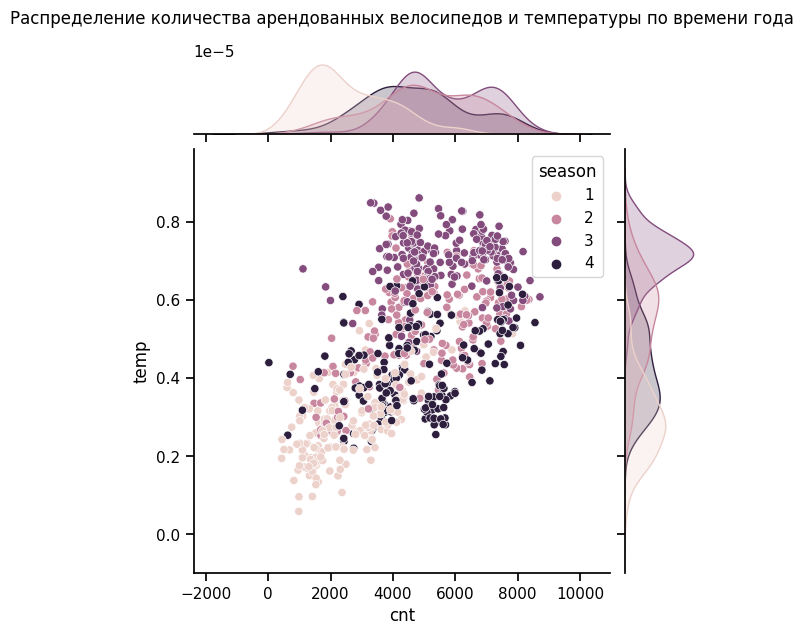

In [64]:
arrData = data[['cnt', 'temp', 'season']]
sns.jointplot(arrData, x = 'cnt', y = 'temp', hue = 'season')
plt.title('Распределение количества арендованных велосипедов и температуры по времени года', pad = 90)

##5. Выбрать часть признаков датасета и отобразить корреляцию между ними в виде тепловой карты (heatmap).

<Axes: title={'center': 'Корреляция между количествоим арендованных велосипедов, temp, hum и windspeed'}>

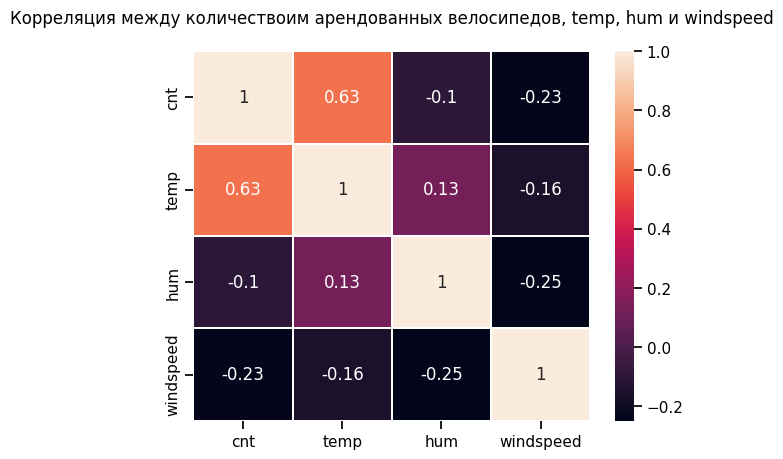

In [66]:
heat = data[['cnt', 'temp', 'hum', 'windspeed']]
heat_cor = heat.corr()
plt.figure()
plt.title('Корреляция между количествоим арендованных велосипедов, temp, hum и windspeed', pad = 20)
sns.heatmap(heat_cor, annot = True, linewidths = 0.3)

<ipython-input-67-f11c6072a2d9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix_cor = data.corr()


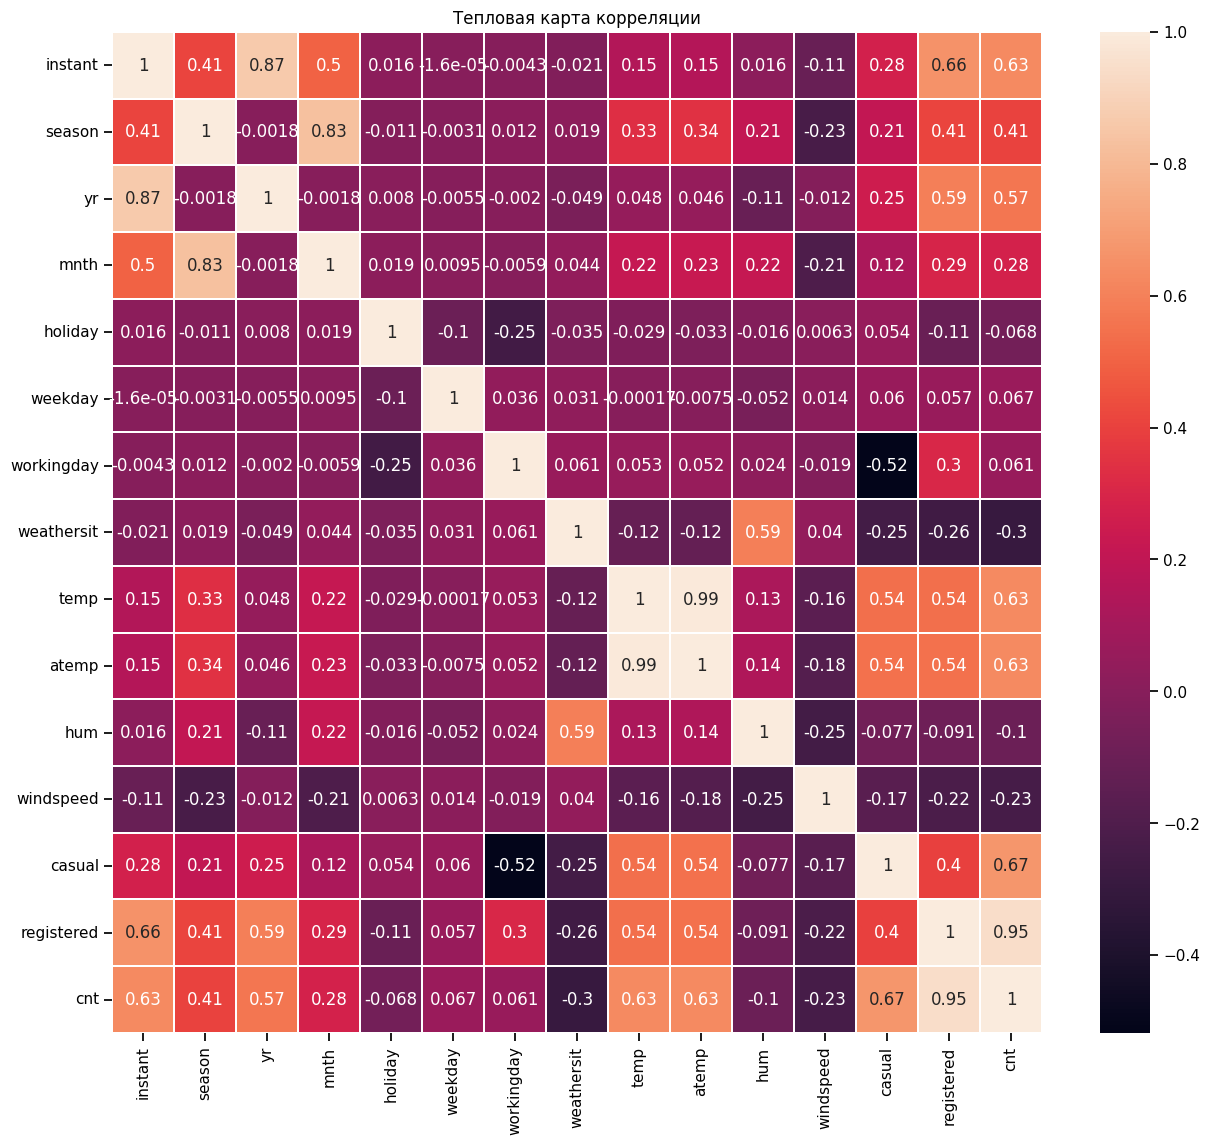

In [67]:
matrix_cor = data.corr()
plt.figure(figsize=(15, 13))
sns.heatmap(matrix_cor, annot = True, linewidths = 0.3)
plt.title("Тепловая карта корреляции")
plt.show()

##6. Выбрать 3 признака (имеющие некое распределение значений), целевую переменную (категориальную) и отобразить для них графики размаха (ящик с усами, box plot).

Зависимость температуры от времени года

<ipython-input-68-dd1d99fcba39>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arrData['season'] = arrData['season'].replace(seasonData)


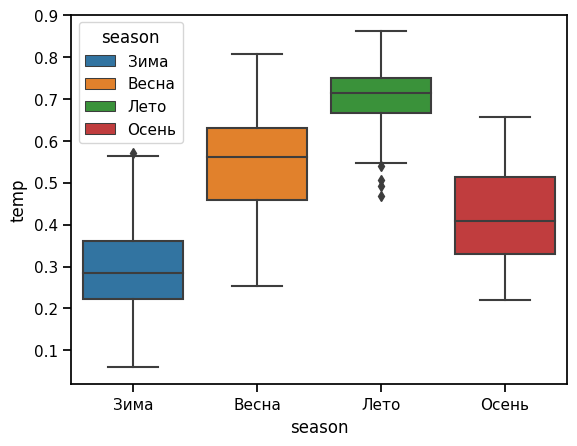

In [68]:
seasonData = {1: 'Зима', 2: 'Весна', 3: 'Лето', 4: 'Осень'}
arrData = data[['temp', 'hum', 'windspeed', 'season']]
arrData['season'] = arrData['season'].replace(seasonData)
sns.boxplot(data = arrData, y = arrData['temp'], x = arrData['season'], hue = arrData['season'], dodge = False)
plt.show()

Зависимость влажности от времени года

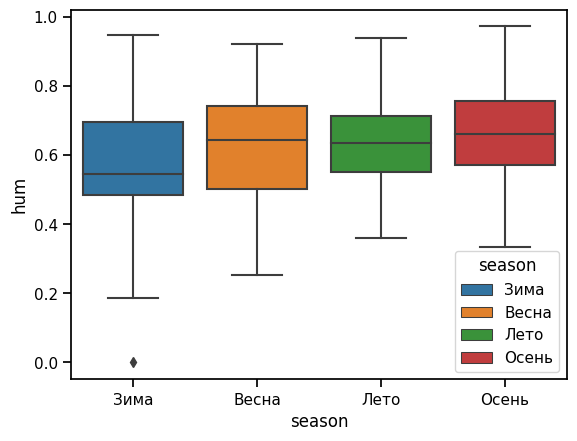

In [69]:
sns.boxplot(data = arrData, y = arrData['hum'], x = arrData['season'], hue = arrData['season'], dodge = False)
plt.show()

Зависимость скорости ветра от времени года

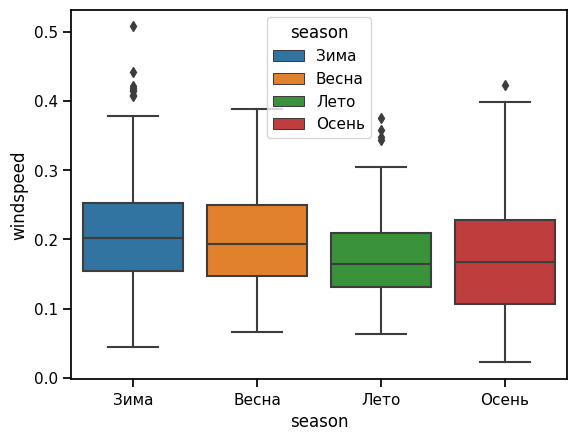

In [70]:
sns.boxplot(data = arrData, y = arrData['windspeed'], x = arrData['season'], hue = arrData['season'], dodge = False)
plt.show()

##7. Визуализировать некоторые статистики, для разных атрибутов с использованием следующих инструментов: violinplot, stripplot, swarmplot, pie.

<ipython-input-72-2f0f69306f0a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  violinData['weekday'] = violinData['weekday'].replace(arrDay)


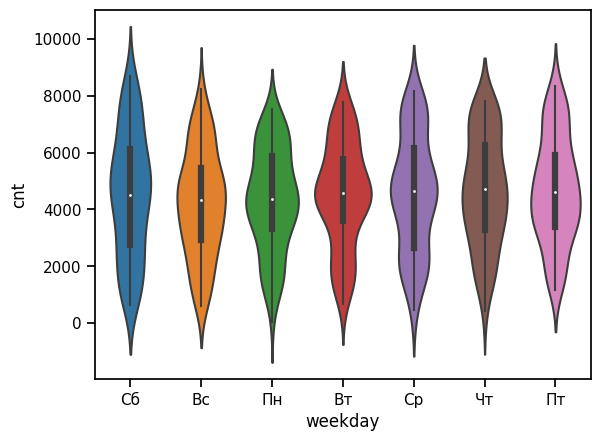

In [72]:
violinData = data[['cnt', 'weekday']]
arrDay = {0: 'Вс', 1: 'Пн', 2: 'Вт', 3: 'Ср', 4: 'Чт', 5: 'Пт', 6: 'Сб'}
violinData['weekday'] = violinData['weekday'].replace(arrDay)
sns.violinplot(data = violinData, y = 'cnt', x = 'weekday')
plt.show()

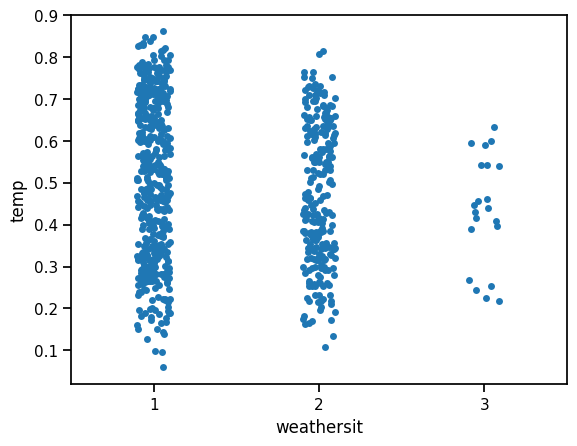

In [77]:
sns.stripplot(data, y = 'temp', x = 'weathersit')
plt.show()

<ipython-input-76-c666b28eeda3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swarmplotData['season'] = swarmplotData['season'].replace(seasonData)


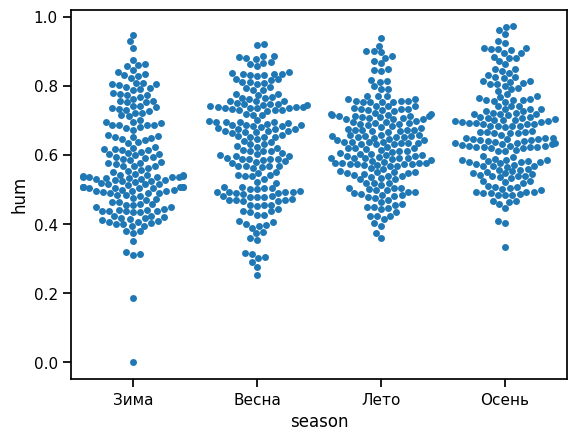

In [76]:
swarmplotData = data[['hum', 'season']]
swarmplotData['season'] = swarmplotData['season'].replace(seasonData)
sns.swarmplot(data = swarmplotData, y = 'hum', x = 'season')
plt.show()

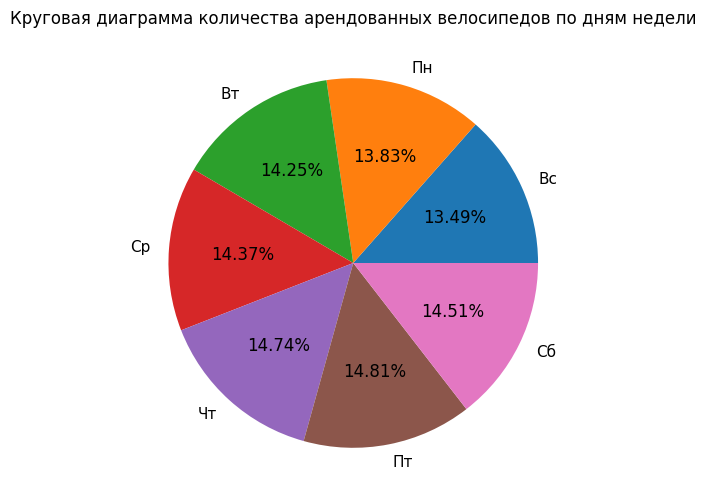

In [74]:
weekdayData = data.groupby('weekday')['cnt'].sum().reset_index()
plt.figure(figsize=(8,6))
weekdayData['weekday'] = weekdayData['weekday'].replace(arrDay)
labels = weekdayData['weekday'].value_counts().keys()
values = weekdayData['cnt']

plt.pie(x = values, labels = labels, autopct = '%1.2f%%')
plt.title('Круговая диаграмма количества арендованных велосипедов по дням недели')
plt.show()

#*Заключение*
1. Чем выше скорость ветра, тем менее охотно люди арендуют велосипеды;
2. Количество арендованных велосипедов зависит и от температуры. Самые большие показатели в середине по всему диапазону температур;
3. Количество арендованных велосипедов практически не зависит от дня недели;
4. В дождливую погоду показатели аренды велосипедов значительно снижаются.